# This exam require you to perform simple exploration steps and simple machine learning pipeline on BitCoin Data. Please perform to your best to complete all the tasks given.

## 1) Setting up Pyspark environent on Google Colab








### 1. Installing dependencies

In [6]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [7]:
# list the current working directory to see what is inside
!ls

drive	     spark-3.1.1-bin-hadoop3.2	    spark-3.1.1-bin-hadoop3.2.tgz.1
sample_data  spark-3.1.1-bin-hadoop3.2.tgz  spark-warehouse


### 2. Assigning Environment Variables

In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

### 3. Launch a Spark Session and Spark Context with PySpark Library 

In [9]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

## 2) Accessing Data

### The problem is about Multivariate Timeseries Forecasting

### 1. Import Utilities/Data Science Libraries

In [31]:
# install pandas profiling
!pip3 install pandas_profiling --upgrade

In [35]:
import os

import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### 2. Importing data files. There are multiple csv files, read all and combine them into 1 spark dataframe. (Hint: you can use directly from pyspark read csv and merge them or create pandas df then create spark df from pandas)

In [8]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# list files in the directory /content/drive/MyDrive/Colab\ Notebooks/BigData/FPT_Master
!ls /content/drive/MyDrive/Colab\ Notebooks/BigData/FPT_Master

avg-block-size.csv		      miners-revenue.csv
avg-confirmation-time.csv	      mvrv.csv
blocks-size.csv			      my-wallet-n-users.csv
cost-per-transaction.csv	      n-transactions.csv
cost-per-transaction-percent.csv      n-transactions-excluding-popular.csv
difficulty.csv			      n-transactions-per-block.csv
estimated-transaction-volume.csv      n-unique-addresses.csv
estimated-transaction-volume-usd.csv  nvt.csv
fees-usd-per-transaction.csv	      nvts.csv
FPT_MASTER_EXAM.ipynb		      output-volume.csv
hash-rate.csv			      total-bitcoins.csv
market-cap.csv			      trade-volume.csv
market-price.csv		      transaction-fees.csv
median-confirmation-time.csv	      transaction-fees-usd.csv
mempool-count.csv		      transactions-per-second.csv
mempool-growth.csv		      utxo-count.csv
mempool-size.csv


In [11]:
file_path = "/content/drive/MyDrive/Colab Notebooks/BigData/FPT_Master"
df = pd.DataFrame()
for f in os.listdir(file_path):
  if f.endswith(".csv"):
    tmp = pd.read_csv(os.path.join(file_path, f))
    if df.empty:
      df = tmp
    else:
      df = pd.merge(df, tmp, on='Timestamp', how="outer")
df

,Timestamp,total-bitcoins,market-price,market-cap,trade-volume,blocks-size,avg-block-size,n-transactions-per-block,median-confirmation-time,avg-confirmation-time,hash-rate,difficulty,miners-revenue,transaction-fees,transaction-fees-usd,fees-usd-per-transaction,cost-per-transaction-percent,cost-per-transaction,n-unique-addresses,n-transactions,transactions-per-second,output-volume,mempool-count,mempool-growth,mempool-size,utxo-count,n-transactions-excluding-popular,estimated-transaction-volume,estimated-transaction-volume-usd,my-wallet-n-users,mvrv,nvt,nvts
0,2009-01-03 18:15:05,50.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-14 06:43:35,21100.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-17 20:25:30,42150.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-21 14:26:49,63200.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-25 01:13:12,84250.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15090,2020-09-26 09:23:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.040732
15091,2020-09-26 20:12:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.002324
15092,2020-09-27 01:55:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.023484
15093,2020-09-27 11:54:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.855225


In [13]:
spark_df = spark.createDataFrame(df)
spark_df.show()

+-------------------+--------------+------------+----------+------------+-----------+--------------+------------------------+------------------------+---------------------+---------+----------+--------------+----------------+--------------------+------------------------+----------------------------+--------------------+------------------+--------------+-----------------------+-------------+-------------+--------------+------------+----------+--------------------------------+----------------------------+--------------------------------+-----------------+----+---+----+
|          Timestamp|total-bitcoins|market-price|market-cap|trade-volume|blocks-size|avg-block-size|n-transactions-per-block|median-confirmation-time|avg-confirmation-time|hash-rate|difficulty|miners-revenue|transaction-fees|transaction-fees-usd|fees-usd-per-transaction|cost-per-transaction-percent|cost-per-transaction|n-unique-addresses|n-transactions|transactions-per-second|output-volume|mempool-count|mempool-growth|memp

### 3. Exploring data structure

#### 1. Viewing the Dataframe

In [14]:
spark_df.show(5)

+-------------------+--------------+------------+----------+------------+-----------+--------------+------------------------+------------------------+---------------------+---------+----------+--------------+----------------+--------------------+------------------------+----------------------------+--------------------+------------------+--------------+-----------------------+-------------+-------------+--------------+------------+----------+--------------------------------+----------------------------+--------------------------------+-----------------+----+---+----+
|          Timestamp|total-bitcoins|market-price|market-cap|trade-volume|blocks-size|avg-block-size|n-transactions-per-block|median-confirmation-time|avg-confirmation-time|hash-rate|difficulty|miners-revenue|transaction-fees|transaction-fees-usd|fees-usd-per-transaction|cost-per-transaction-percent|cost-per-transaction|n-unique-addresses|n-transactions|transactions-per-second|output-volume|mempool-count|mempool-growth|memp

In [15]:
spark_df.limit(5)

Timestamp,total-bitcoins,market-price,market-cap,trade-volume,blocks-size,avg-block-size,n-transactions-per-block,median-confirmation-time,avg-confirmation-time,hash-rate,difficulty,miners-revenue,transaction-fees,transaction-fees-usd,fees-usd-per-transaction,cost-per-transaction-percent,cost-per-transaction,n-unique-addresses,n-transactions,transactions-per-second,output-volume,mempool-count,mempool-growth,mempool-size,utxo-count,n-transactions-excluding-popular,estimated-transaction-volume,estimated-transaction-volume-usd,my-wallet-n-users,mvrv,nvt,nvts
2009-01-03 18:15:05,50.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-14 06:43:35,21100.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-17 20:25:30,42150.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-21 14:26:49,63200.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-25 01:13:12,84250.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Viewing Dataframe Columns

In [49]:
print(len(spark_df.columns))

33


In [16]:
spark_df.columns

['Timestamp',
 'total-bitcoins',
 'market-price',
 'market-cap',
 'trade-volume',
 'blocks-size',
 'avg-block-size',
 'n-transactions-per-block',
 'median-confirmation-time',
 'avg-confirmation-time',
 'hash-rate',
 'difficulty',
 'miners-revenue',
 'transaction-fees',
 'transaction-fees-usd',
 'fees-usd-per-transaction',
 'cost-per-transaction-percent',
 'cost-per-transaction',
 'n-unique-addresses',
 'n-transactions',
 'transactions-per-second',
 'output-volume',
 'mempool-count',
 'mempool-growth',
 'mempool-size',
 'utxo-count',
 'n-transactions-excluding-popular',
 'estimated-transaction-volume',
 'estimated-transaction-volume-usd',
 'my-wallet-n-users',
 'mvrv',
 'nvt',
 'nvts']

#### 3. Viewing Dataframe Schema

In [17]:
spark_df.dtypes

[('Timestamp', 'string'),
 ('total-bitcoins', 'double'),
 ('market-price', 'double'),
 ('market-cap', 'double'),
 ('trade-volume', 'double'),
 ('blocks-size', 'double'),
 ('avg-block-size', 'double'),
 ('n-transactions-per-block', 'double'),
 ('median-confirmation-time', 'double'),
 ('avg-confirmation-time', 'double'),
 ('hash-rate', 'double'),
 ('difficulty', 'double'),
 ('miners-revenue', 'double'),
 ('transaction-fees', 'double'),
 ('transaction-fees-usd', 'double'),
 ('fees-usd-per-transaction', 'double'),
 ('cost-per-transaction-percent', 'double'),
 ('cost-per-transaction', 'double'),
 ('n-unique-addresses', 'double'),
 ('n-transactions', 'double'),
 ('transactions-per-second', 'double'),
 ('output-volume', 'double'),
 ('mempool-count', 'double'),
 ('mempool-growth', 'double'),
 ('mempool-size', 'double'),
 ('utxo-count', 'double'),
 ('n-transactions-excluding-popular', 'double'),
 ('estimated-transaction-volume', 'double'),
 ('estimated-transaction-volume-usd', 'double'),
 ('my-

In [18]:
spark_df.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- total-bitcoins: double (nullable = true)
 |-- market-price: double (nullable = true)
 |-- market-cap: double (nullable = true)
 |-- trade-volume: double (nullable = true)
 |-- blocks-size: double (nullable = true)
 |-- avg-block-size: double (nullable = true)
 |-- n-transactions-per-block: double (nullable = true)
 |-- median-confirmation-time: double (nullable = true)
 |-- avg-confirmation-time: double (nullable = true)
 |-- hash-rate: double (nullable = true)
 |-- difficulty: double (nullable = true)
 |-- miners-revenue: double (nullable = true)
 |-- transaction-fees: double (nullable = true)
 |-- transaction-fees-usd: double (nullable = true)
 |-- fees-usd-per-transaction: double (nullable = true)
 |-- cost-per-transaction-percent: double (nullable = true)
 |-- cost-per-transaction: double (nullable = true)
 |-- n-unique-addresses: double (nullable = true)
 |-- n-transactions: double (nullable = true)
 |-- transactions-per-second: d

## 3) Feature Engineering

### 1. Unroll TimeStamp column using Fast.ai Tabular Model

In [74]:
# convert string to datetime unix nano second
df['Timestamp'] = pd.to_datetime(df['Timestamp']).astype(int)
df


,Timestamp,total-bitcoins,market-price,market-cap,trade-volume,blocks-size,avg-block-size,n-transactions-per-block,median-confirmation-time,avg-confirmation-time,hash-rate,difficulty,miners-revenue,transaction-fees,transaction-fees-usd,fees-usd-per-transaction,cost-per-transaction-percent,cost-per-transaction,n-unique-addresses,n-transactions,transactions-per-second,output-volume,mempool-count,mempool-growth,mempool-size,utxo-count,n-transactions-excluding-popular,estimated-transaction-volume,estimated-transaction-volume-usd,my-wallet-n-users,mvrv,nvt,nvts
0,1231006505000000000,50.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1231915415000000000,21100.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1232223930000000000,42150.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1232548009000000000,63200.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1232845992000000000,84250.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15090,1601112201000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.040732
15091,1601151140000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.002324
15092,1601171758000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.023484
15093,1601207689000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.855225


### 2. Categorize variables into independent and dependent variables. In Machine Learning, the result is dependent variable and independent variables also be called as features

#### 2a. Reformat True/False columns to binary scale

In [111]:
columns = list(spark_df.columns)

In [112]:
# dependent_cols = [
#   'trade-volume',
#   'blocks-size',
#   'miners-revenue',
#   'n-transactions',
#   'output-volume'
# ]

dependent_cols = [
  'trade-volume'
]

In [113]:
independent_cols = []
for col in columns:
  if col not in dependent_cols:
    independent_cols.append(col)
print(independent_cols)

['Timestamp', 'total-bitcoins', 'market-price', 'market-cap', 'blocks-size', 'avg-block-size', 'n-transactions-per-block', 'median-confirmation-time', 'avg-confirmation-time', 'hash-rate', 'difficulty', 'miners-revenue', 'transaction-fees', 'transaction-fees-usd', 'fees-usd-per-transaction', 'cost-per-transaction-percent', 'cost-per-transaction', 'n-unique-addresses', 'n-transactions', 'transactions-per-second', 'output-volume', 'mempool-count', 'mempool-growth', 'mempool-size', 'utxo-count', 'n-transactions-excluding-popular', 'estimated-transaction-volume', 'estimated-transaction-volume-usd', 'my-wallet-n-users', 'mvrv', 'nvt', 'nvts']


## 4) Statiscal Analysis of Data Frame

### 1. Create SQLContext for simple query

In [19]:
from pyspark.sql import SQLContext
from pyspark.sql.functions import isnan, when, count, col, isnull

sc = spark.sparkContext
sqlContext = SQLContext(sc)

### 2. Create a temporary table from spark df and perform sql queries. Any queries range from simple select to more complex aggregate is welcome. Create new dataframes from those queries

In [20]:
bitcoin_table = sqlContext.registerDataFrameAsTable(spark_df, "bitcoin_table")
sqlContext.sql("show tables").show()

+--------+-------------+-----------+
|database|    tableName|isTemporary|
+--------+-------------+-----------+
|        |bitcoin_table|       true|
+--------+-------------+-----------+



In [21]:
query = "SELECT * FROM bitcoin_table"
df1 = sqlContext.sql(query)
df1.show()

+-------------------+--------------+------------+----------+------------+-----------+--------------+------------------------+------------------------+---------------------+---------+----------+--------------+----------------+--------------------+------------------------+----------------------------+--------------------+------------------+--------------+-----------------------+-------------+-------------+--------------+------------+----------+--------------------------------+----------------------------+--------------------------------+-----------------+----+---+----+
|          Timestamp|total-bitcoins|market-price|market-cap|trade-volume|blocks-size|avg-block-size|n-transactions-per-block|median-confirmation-time|avg-confirmation-time|hash-rate|difficulty|miners-revenue|transaction-fees|transaction-fees-usd|fees-usd-per-transaction|cost-per-transaction-percent|cost-per-transaction|n-unique-addresses|n-transactions|transactions-per-second|output-volume|mempool-count|mempool-growth|memp

In [22]:
# count number of rows
df1.count()

15095

In [23]:
# count number of rows whose values is NaN or Null 
df2 = df1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df1.columns])
df2.show()

+---------+--------------+------------+----------+------------+-----------+--------------+------------------------+------------------------+---------------------+---------+----------+--------------+----------------+--------------------+------------------------+----------------------------+--------------------+------------------+--------------+-----------------------+-------------+-------------+--------------+------------+----------+--------------------------------+----------------------------+--------------------------------+-----------------+-----+-----+-----+
|Timestamp|total-bitcoins|market-price|market-cap|trade-volume|blocks-size|avg-block-size|n-transactions-per-block|median-confirmation-time|avg-confirmation-time|hash-rate|difficulty|miners-revenue|transaction-fees|transaction-fees-usd|fees-usd-per-transaction|cost-per-transaction-percent|cost-per-transaction|n-unique-addresses|n-transactions|transactions-per-second|output-volume|mempool-count|mempool-growth|mempool-size|utxo-co

### 3. Convert Spark df to Pandas df and using pandas-profiling to give a report. You should see a large amount of NaN values, please fill them with 0

In [24]:
pandas_df = spark_df.toPandas()
pandas_df

,Timestamp,total-bitcoins,market-price,market-cap,trade-volume,blocks-size,avg-block-size,n-transactions-per-block,median-confirmation-time,avg-confirmation-time,hash-rate,difficulty,miners-revenue,transaction-fees,transaction-fees-usd,fees-usd-per-transaction,cost-per-transaction-percent,cost-per-transaction,n-unique-addresses,n-transactions,transactions-per-second,output-volume,mempool-count,mempool-growth,mempool-size,utxo-count,n-transactions-excluding-popular,estimated-transaction-volume,estimated-transaction-volume-usd,my-wallet-n-users,mvrv,nvt,nvts
0,2009-01-03 18:15:05,50.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-14 06:43:35,21100.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-17 20:25:30,42150.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-21 14:26:49,63200.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-25 01:13:12,84250.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15090,2020-09-26 09:23:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.040732
15091,2020-09-26 20:12:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.002324
15092,2020-09-27 01:55:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.023484
15093,2020-09-27 11:54:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.855225


In [25]:
pandas_df = pandas_df.fillna(0)
pandas_df

,Timestamp,total-bitcoins,market-price,market-cap,trade-volume,blocks-size,avg-block-size,n-transactions-per-block,median-confirmation-time,avg-confirmation-time,hash-rate,difficulty,miners-revenue,transaction-fees,transaction-fees-usd,fees-usd-per-transaction,cost-per-transaction-percent,cost-per-transaction,n-unique-addresses,n-transactions,transactions-per-second,output-volume,mempool-count,mempool-growth,mempool-size,utxo-count,n-transactions-excluding-popular,estimated-transaction-volume,estimated-transaction-volume-usd,my-wallet-n-users,mvrv,nvt,nvts
0,2009-01-03 18:15:05,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,2009-01-14 06:43:35,21100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,2009-01-17 20:25:30,42150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,2009-01-21 14:26:49,63200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,2009-01-25 01:13:12,84250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15090,2020-09-26 09:23:21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.040732
15091,2020-09-26 20:12:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.002324
15092,2020-09-27 01:55:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.023484
15093,2020-09-27 11:54:49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.855225


In [28]:
prof = ProfileReport(pandas_df)

In [29]:
prof

Summarize dataset:   0%|          | 0/46 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 5) Feature Correlation

### 1. Get correlation matrix values for all values

In [33]:
corr_df = pandas_df.corr()
corr_df

,total-bitcoins,market-price,market-cap,trade-volume,blocks-size,avg-block-size,n-transactions-per-block,median-confirmation-time,avg-confirmation-time,hash-rate,difficulty,miners-revenue,transaction-fees,transaction-fees-usd,fees-usd-per-transaction,cost-per-transaction-percent,cost-per-transaction,n-unique-addresses,n-transactions,transactions-per-second,output-volume,mempool-count,mempool-growth,mempool-size,utxo-count,n-transactions-excluding-popular,estimated-transaction-volume,estimated-transaction-volume-usd,my-wallet-n-users,mvrv,nvt,nvts
total-bitcoins,1.000000,-0.050199,0.689408,-0.031730,-0.059846,-0.069212,-0.068679,-0.078718,-0.022968,-0.041942,-0.041873,-0.051087,-0.042520,-0.021416,-0.023981,-0.046046,-0.060594,-0.068681,-0.069293,-0.095847,-0.046048,-0.050621,-0.057343,-0.051758,-0.095884,-0.069548,-0.068218,-0.057251,-0.093453,-0.084225,-0.071854,-0.095196
market-price,-0.050199,1.000000,-0.028285,0.681466,-0.033228,-0.038428,-0.038132,0.590936,0.141792,0.842450,0.839491,-0.028364,-0.023608,-0.011891,-0.013315,0.009960,-0.033643,0.014552,-0.038472,-0.052078,0.279735,-0.028105,-0.031158,-0.028737,-0.055516,0.811086,0.083991,0.353033,-0.050013,-0.047484,-0.041083,-0.053870
market-cap,0.689408,-0.028285,1.000000,-0.017878,-0.033720,-0.038997,-0.038697,-0.044353,-0.012941,-0.023632,-0.023593,-0.028785,-0.023958,-0.012067,-0.013512,-0.025944,-0.034142,-0.038698,-0.039043,-0.054005,-0.025946,-0.028522,-0.032310,-0.029163,-0.048944,-0.039187,-0.038438,-0.032258,-0.052656,-0.047532,-0.040175,-0.051689
trade-volume,-0.031730,0.681466,-0.017878,1.000000,-0.021003,-0.024290,-0.024103,0.405633,0.152114,0.326646,0.325288,-0.017929,-0.014922,-0.007516,-0.008416,0.002912,-0.021265,-0.005589,-0.024318,-0.031955,0.190083,-0.017765,-0.019127,-0.018164,-0.035091,0.488274,0.055596,0.262601,-0.032666,-0.030014,-0.025968,-0.034051
blocks-size,-0.059846,-0.033228,-0.033720,-0.021003,1.000000,0.941974,0.935878,-0.052105,-0.015203,-0.027762,-0.027717,0.835337,0.474225,0.332488,0.362796,0.010488,0.766481,0.026213,0.931056,-0.061618,-0.030480,-0.033507,-0.037040,-0.034260,-0.066185,-0.046035,0.111618,0.296674,-0.058006,-0.056610,-0.048978,-0.064224
avg-block-size,-0.069212,-0.038428,-0.038997,-0.024290,0.941974,1.000000,0.991353,-0.060259,-0.017582,-0.032107,-0.032054,0.789291,0.597893,0.372617,0.405769,0.013026,0.744395,0.001257,0.987381,-0.071592,-0.035250,-0.038751,-0.042976,-0.039621,-0.076543,-0.053239,0.155486,0.284393,-0.066749,-0.065469,-0.056643,-0.074274
n-transactions-per-block,-0.068679,-0.038132,-0.038697,-0.024103,0.935878,0.991353,1.000000,-0.059795,-0.017447,-0.031860,-0.031807,0.779653,0.606362,0.377197,0.400791,0.013002,0.717186,0.006497,0.994022,-0.071151,-0.034979,-0.038452,-0.042698,-0.039316,-0.075953,-0.052830,0.155498,0.280465,-0.065911,-0.064965,-0.056207,-0.073703
median-confirmation-time,-0.078718,0.590936,-0.044353,0.405633,-0.052105,-0.060259,-0.059795,1.000000,0.104992,0.463441,0.471664,-0.044479,-0.037020,-0.018646,-0.020879,0.036987,-0.052756,0.011853,-0.060329,-0.082089,0.525434,-0.044073,-0.049087,-0.045063,-0.087055,0.804803,0.206462,0.205185,-0.077201,-0.074461,-0.064422,-0.084475
avg-confirmation-time,-0.022968,0.141792,-0.012941,0.152114,-0.015203,-0.017582,-0.017447,0.104992,1.000000,0.060095,0.059812,-0.012978,-0.010802,-0.005440,-0.006092,-0.007906,-0.015393,-0.013438,-0.017603,-0.023919,0.051277,-0.012859,-0.014298,-0.013148,-0.025401,0.117984,0.007477,0.049408,-0.023454,-0.021726,-0.018797,-0.024648
hash-rate,-0.041942,0.842450,-0.023632,0.326646,-0.027762,-0.032107,-0.031860,0.463441,0.060095,1.000000,0.994641,-0.023699,-0.019725,-0.009935,-0.011125,0.007879,-0.028109,0.046461,-0.032144,-0.044255,0.198853,-0.023483,-0.026476,-0.024010,-0.046384,0.725915,0.059581,0.264651,-0.040777,-0.039674,-0.034325,-0.045010


### 2. Create a heatmap to show correlation between dependent variable to all categories of features

In [43]:
def plot_correlation(corr_matrix):
  fig, ax = plt.subplots()
  fig.set_figwidth(20)
  fig.set_figheight(20)
  sns.heatmap(corr_matrix, 
              annot=True, # show the values
              fmt=".2f", # format of the value
              cmap=sns.light_palette("#F4D03F", as_cmap=True), # color map to be used 
              ax=ax # plot on the `ax` we just instaniated
            )

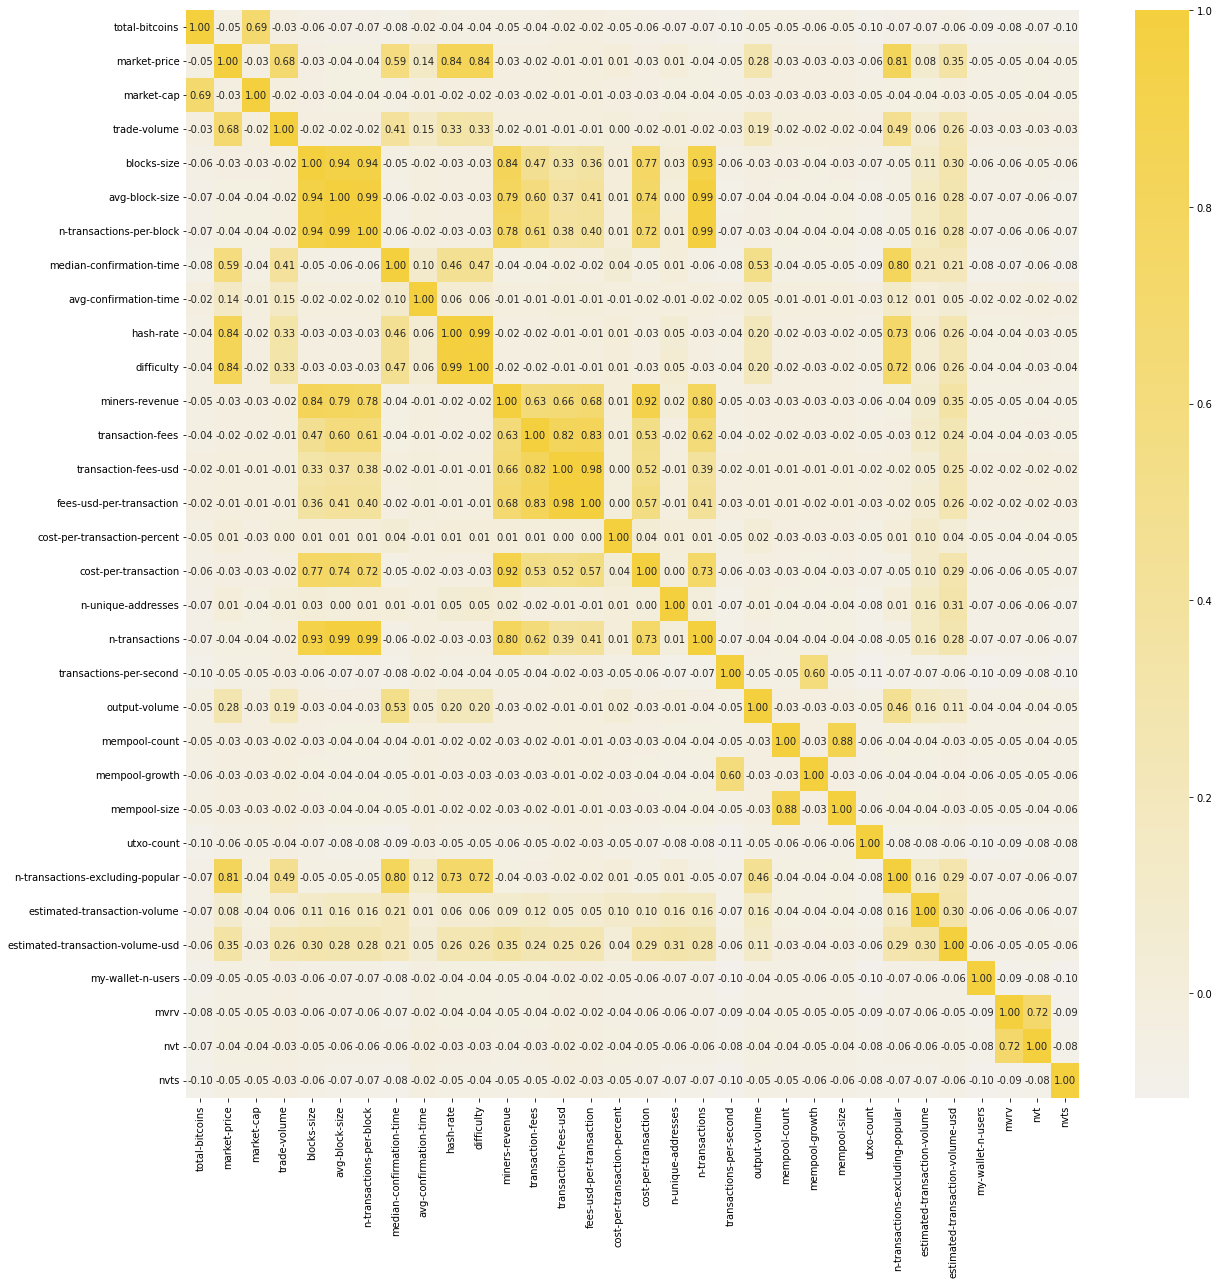

In [44]:
plot_correlation(corr_df)

### 3. Identifying highly correlated features with target and other features. Using heatmap to show them all. The threshold is freely defined upon your decision

In [40]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
# threshold = 0.5, get all highly correlated features
high_corr_cols = correlation(pandas_df, 0.5)
high_corr_cols

{'avg-block-size',
 'cost-per-transaction',
 'difficulty',
 'fees-usd-per-transaction',
 'hash-rate',
 'market-cap',
 'median-confirmation-time',
 'mempool-growth',
 'mempool-size',
 'miners-revenue',
 'n-transactions',
 'n-transactions-excluding-popular',
 'n-transactions-per-block',
 'nvt',
 'trade-volume',
 'transaction-fees-usd'}

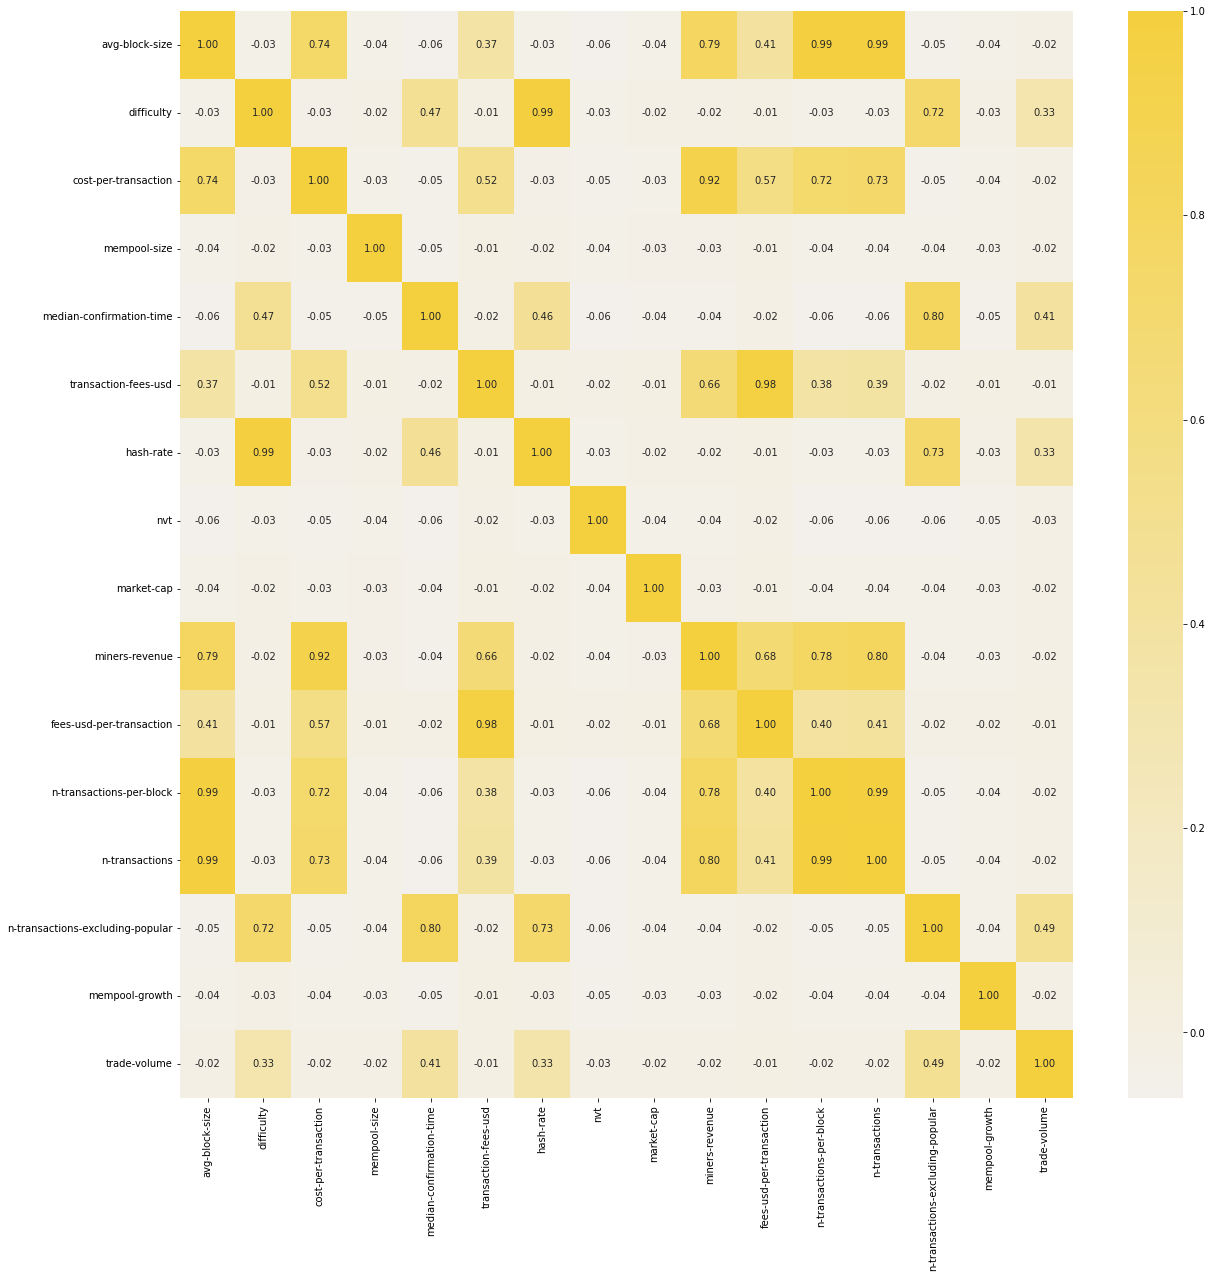

In [46]:
high_corr_df = pandas_df[high_corr_cols].corr()
plot_correlation(high_corr_df)

### 4. Drop highly correlated featurs. Visualize again using heatmap

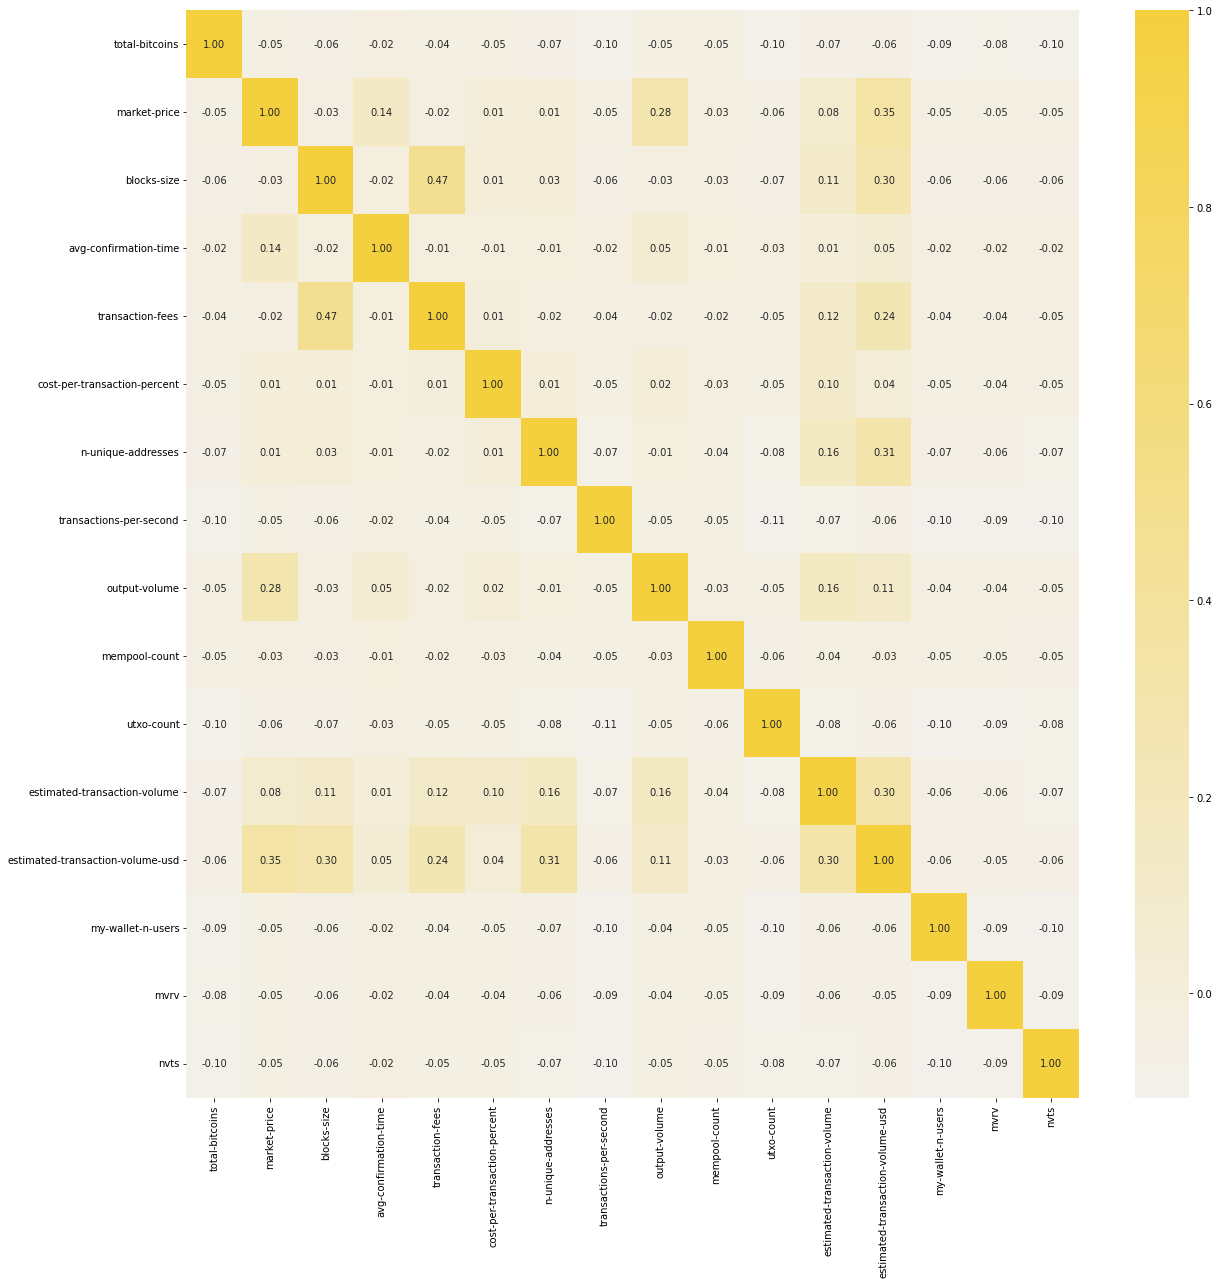

In [48]:
for col in high_corr_cols:
  pandas_df = pandas_df.drop(col, 1)

plot_correlation(pandas_df.corr())

# 6) Build a machine learning pipeline

## 1. Using sklearn linear regression and feature selection rfe to estimate feature before putting to sparkml pipeline

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [119]:
df = df.fillna(0)
X = df[independent_cols]
y = df[dependent_cols]
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
# fit the model on all available data
rfe.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [130]:
print(rfe)
print(rfe.n_features_)
print(rfe.support_)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)
10
[False False  True False False  True False  True  True False False False
 False False  True  True False False False  True False False False False
 False False False False False  True  True  True]


## 2. Assemble the feature and transform data

In [137]:
# remove redundant columns in spark_df
for i in range(len(X.columns)):
  if not rfe.support_[i]:
    spark_df = spark_df.drop(X.columns[i])

spark_df.columns

['market-price',
 'trade-volume',
 'avg-block-size',
 'median-confirmation-time',
 'avg-confirmation-time',
 'fees-usd-per-transaction',
 'cost-per-transaction-percent',
 'transactions-per-second',
 'mvrv',
 'nvt',
 'nvts']

In [142]:
features = []
for col in spark_df.columns:
  if col not in dependent_cols:
    features.append(col)

print(features)

['market-price', 'avg-block-size', 'median-confirmation-time', 'avg-confirmation-time', 'fees-usd-per-transaction', 'cost-per-transaction-percent', 'transactions-per-second', 'mvrv', 'nvt', 'nvts']


In [151]:
spark_df.show()

+------------+------------+--------------+------------------------+---------------------+------------------------+----------------------------+-----------------------+----+---+----+
|market-price|trade-volume|avg-block-size|median-confirmation-time|avg-confirmation-time|fees-usd-per-transaction|cost-per-transaction-percent|transactions-per-second|mvrv|nvt|nvts|
+------------+------------+--------------+------------------------+---------------------+------------------------+----------------------------+-----------------------+----+---+----+
|         0.0|         0.0|           0.0|                     0.0|                  0.0|                     0.0|                         0.0|                    0.0| 0.0|0.0| 0.0|
|         0.0|         0.0|           0.0|                     0.0|                  0.0|                     0.0|                         0.0|                    0.0| 0.0|0.0| 0.0|
|         0.0|         0.0|           0.0|                     0.0|                  0.0| 

In [149]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [154]:
assembler = VectorAssembler(
    inputCols=features,
    outputCol='features')
output = assembler.transform(spark_df)
dataset = output.select('features', dependent_cols[0])

In [155]:
dataset.show()

+----------+------------+
|  features|trade-volume|
+----------+------------+
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
|(10,[],[])|         0.0|
+----------+------------+
only showing top 20 rows



## 3. Split data into training and testing set

In [156]:
train_data, test_data = dataset.randomSplit([0.8,0.2])
train_data.describe().show()

+-------+-------------------+
|summary|       trade-volume|
+-------+-------------------+
|  count|              12082|
|   mean|  9971568.124855613|
| stddev|9.067622664715008E7|
|    min|                0.0|
|    max|  2.4911491036881E9|
+-------+-------------------+



In [157]:
test_data.describe().show()

+-------+--------------------+
|summary|        trade-volume|
+-------+--------------------+
|  count|                3013|
|   mean| 1.180544939816917E7|
| stddev|1.2293870058106002E8|
|    min|                 0.0|
|    max|   4.9568495161936E9|
+-------+--------------------+



## 4. Fit the linear regression model using pyspark ml

In [160]:
from pyspark.ml.regression import LinearRegression

In [168]:
lr = LinearRegression(maxIter=100000, featuresCol='features', labelCol=dependent_cols[0])

# Fit the model
lrModel = lr.fit(train_data)

In [174]:
train_result = lrModel.evaluate(train_data)
print('Rsquared Error :', train_result.r2)

Rsquared Error : 0.4787074164980948


# 7) Test and give the model summary

In [170]:
predictions = lrModel.transform(test_data.select('features', dependent_cols[0]))
predictions.show()

+----------+------------+------------------+
|  features|trade-volume|        prediction|
+----------+------------+------------------+
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[])|         0.0|-1564182.847263442|
|(10,[],[]

In [176]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(predictionCol='prediction', labelCol=dependent_cols[0])
test_result = evaluator.setMetricName('r2').evaluate(predictions)

print('Rsquared Test Error :', test_result)

Rsquared Test Error : 0.4377853925531273
